- [np.polyfit(X, y, deg=)](#poly)
- __Actual Points, Fit line, Residuals__ (if single feature)
<br>[sns.scatterplot(data=, x='', y='')](#plotting)
<br>[sns.lineplot(data=, x='', y='', color='')](#plotting)
<br>[plt.vlines(data=, x='', ymin='', ymax='')](#plotting)
- __Distribution of Residuals__
<br>[sns.kdeplot(data['residuals'])](#distr)
<br>[sns.displot(data['residuals'], bins=, kde=True)](#distr)
- __The raw residual points themselves against the Y true value__
<br>[sns.scatterplot(x=y_test, y=test_residuals)](#residualsPlot)
<br>[plt.axhline(y=0, color='', ls='')](#residualsPlot)
- __*So the residual errors, in general, should be random and close to a normal distribution.__
- __Normal Probability Plot__
<br>[import scipy as sp](#probplot)
<br>[fig, ax = plt.subplots(figsize=(6,8), dpi=100)](#probplot)
<br>[_ = sp.stats.probplot(test_residuals, plot=ax)](#probplot)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# Evaluating Residuals

- Often __for Linear Regression__, it's a good idea to separately __evaluate residuals (y - y^)__ and not just calculate performance metrics (e.g. RMSE).
- Let's explore why this is important...

What we're talking about right now is actually specific to linear regression.
<br>Linear regression sometimes is actually not appropriate depending on the data set.
<br>So let's explore how actually __visualizing a residual plot__ can help us __determine whether or not linear regression was appropriate__ for our data set.

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [2]:
from PIL import Image

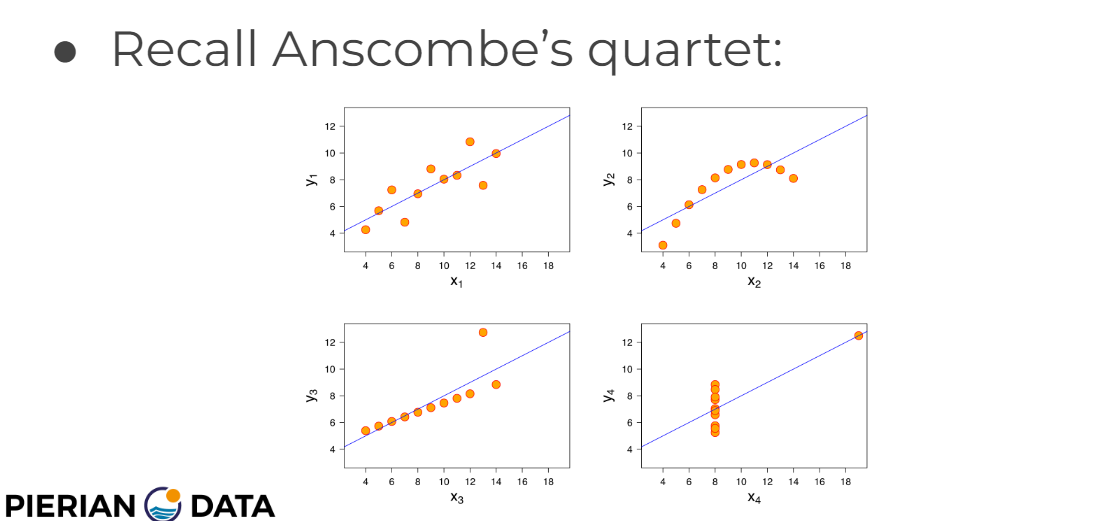

In [3]:
Image.open('quartet.png')

Recall that we have __Anscombe's quartet__ as a set of four different sets of data points, and each of these actually has very similar summary statistics. For each of these four data sets we actually have the exact same mean as well as the exact same variance. And then also we can visualize here that if you were to calculate the linear regression line of best fit, it's the same for all four data sets.

So clearly, linear regression is not suitable for three of these.

Here it's really easy to tell, as we're limited to one feature. I'm just plotting Y versus X, and since I have a single feature, I can very easily just tell visually that for three of these, this line doesn't really make sense as an appropriate fit.

But we can't actually see this discrepancy visually if we have multiple features.

What we could do, however, (that's going to be able to scale to any number of features), is __plotting the residual error against the true y values__.

---

In [4]:
quartet = pd.read_csv('anscombes_quartet1.csv')

In [5]:
quartet

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [6]:
np.polyfit(quartet['x'], quartet['y'], deg=1)

array([0.50009091, 3.00009091])

In [7]:
# y^ = 3.00 + 0.500x

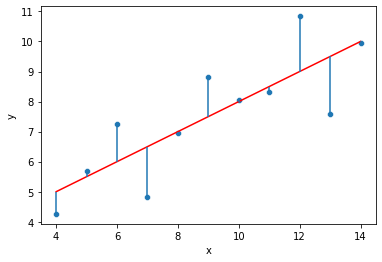

In [8]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(data=quartet, x='x', ymin='y', ymax='pred_y')

__So the residual errors, in general, should be random and close to a normal distribution.__

---

<AxesSubplot:xlabel='residual', ylabel='Density'>

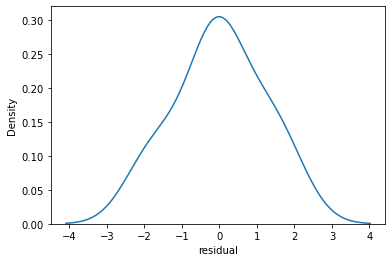

In [9]:
sns.kdeplot(quartet['residual'])

If I were to just actually check out __the distribution of the errors__, I should have get something that looks __normally distributed__.
<br>So we hope that the residuals themselves, when distributed, are close to a mean of zero because we want them to be centered around zero since zero indicates a perfect fit.

---

I can expand on this idea of checking my residuals by not just plotting their distribution, but __plotting the raw residual points themselves against the Y true value__.

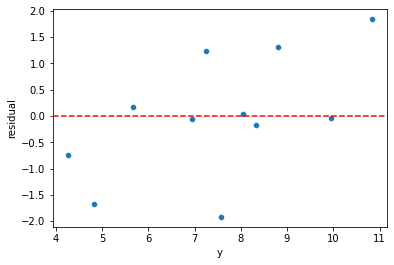

In [10]:
sns.scatterplot(data=quartet, x='y', y='residual')
plt.axhline(y=0, ls='--', color='red')

So, if I had a perfect fit and I was hitting every single data point and there was no errors, then I would expect all these blue points of the residual to be right on that red dotted line.
<br>But, obviously, we're not going to have a real perfect fit for real world data sets.

This actual __residual plot__ should pretty much be __random__. __There shouldn't be any clear line or curve.__

So, __keep in mind__ that all we're doing here is residual versus Y true value, which means I'm not actually considering any number of features. So I should be able to scale this particular residual plot to any number of features.

---
---

In [11]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [12]:
np.polyfit(quartet['x'], quartet['y'], deg=1)

array([0.5       , 3.00090909])

In [13]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

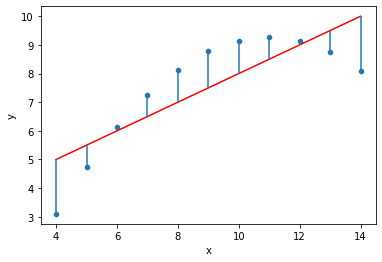

In [14]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(data=quartet, x='x', ymin='y', ymax='pred_y')

- __This one__ is limiting (is possible to plot in case of 1 feature) because it implies we only have one feature.

<AxesSubplot:xlabel='residual', ylabel='Density'>

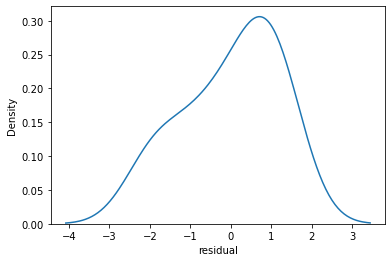

In [15]:
sns.kdeplot(quartet['residual'])

And then __this plot__ is showing a distribution of residuals. You can already see it's a little suspicious because while it does appear to more or less be around the zero mean, it doesn't look exactly normally distributed.

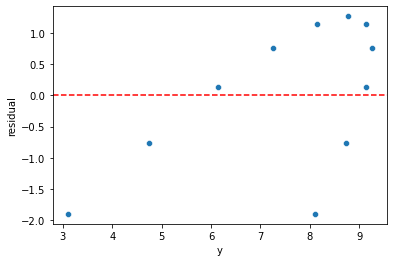

In [16]:
sns.scatterplot(data=quartet, x='y', y='residual')
plt.axhline(y=0, ls='--', color='red')

- However, the real indicator, and this is the clear one, is __the residual plot__ itself (__the third one__). There is a clear curve or pattern within the residual plot. And this should be ringing alarm bells of the fact that this data set itself is not valid for linear regression and you should choose another model.

---
---

In [17]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [18]:
np.polyfit(quartet['x'], quartet['y'], deg=1)

array([0.49990909, 3.00172727])

In [19]:
quartet['pred_y'] = 3 + .5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

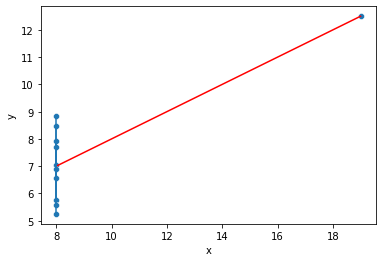

In [20]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='r')
plt.vlines(data=quartet, x='x', ymin='y', ymax='pred_y')

<AxesSubplot:xlabel='residual', ylabel='Density'>

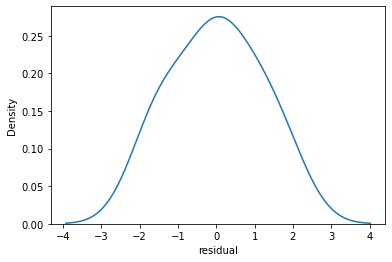

In [21]:
sns.kdeplot(quartet['residual'])

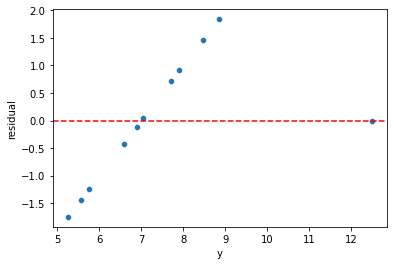

In [22]:
sns.scatterplot(data=quartet, x='y', y='residual')
plt.axhline(y=0, color='r', linestyle='--')

---
---

What I want to do now is understand if the underlying data set (Advertising data set) was a valid data set for linear regression.

So what I can do is simply plot out the residuals against the Y test values.

In [23]:
df = pd.read_csv('Advertising.csv')

In [24]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
X = df.drop('sales', axis=1)
y = df['sales']

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
test_predictions = model.predict(X_test)

In [32]:
test_residuals = y_test - test_predictions

In [33]:
# test_residuals

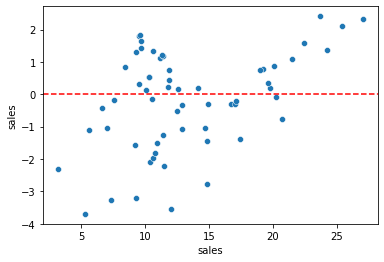

In [34]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')
# more or less looks random. there's no clear line or curve

And hopefully it should also look distributed around zero. And we can also check this out with a distribution plot.

<AxesSubplot:xlabel='sales', ylabel='Density'>

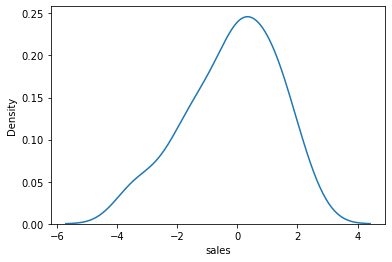

In [35]:
sns.kdeplot(x=test_residuals)

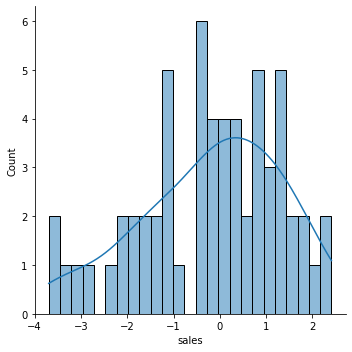

In [36]:
sns.displot(test_residuals, bins=25, kde=True)

---
---

<a id='probplot'></a>

Sometimes, depending on your data set, it could be a little hard to see if your distribution is normal or normality is a reasonable approximation. There's something called __a normal probability plot__ that actually allows you __to compare what a perfectly normally distributed dataset would look like against your actual values__.

https://en.wikipedia.org/wiki/Normal_probability_plot

In [37]:
import scipy as sp

What it does is it compares your quantiles to the theoretical ones if it was normally distributed.

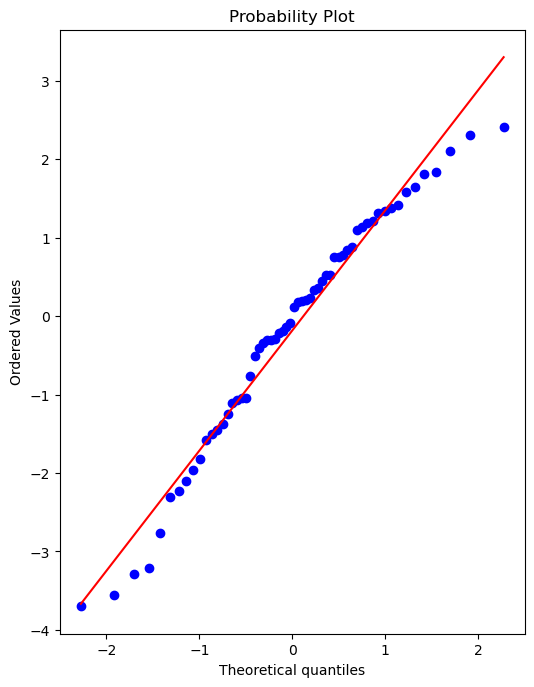

In [38]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals, plot=ax)

What this is showing you is the red line is what normal distribution should look like. Obviously, when we're dealing with real data sets, their residuals are not going to be absolutely perfectly normally distributed, but they should more or less fit along this line where you may have trouble is towards the extremes.

So if you start seeing these blue dots really diverge from this red line at either point or even in the middle, then again, you know that there's an issue with your data set because the residuals are really skewing way off a normal distribution.

So, just __keep in mind__ that this is a toolkit for you in case you're having a little trouble reading the direct distribution plot.

---

OLS is the method of choosing the best line (recall its the criteria for choosing the Beta coeffs). Gradient descent is how we actualy solve the OLS constraint.

---
